In [1]:
import os
import time
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
from turtle import color
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  #close copy warning   

In [2]:
property_df = pd.read_csv("../data/curated/data.csv")

In [3]:
property_df.head(2)

,address,rent_weekly,floor,suburb,postcode,type,furnitured,pool,gym,num_bed,...,cloest_HELIPORT,cloest_AIRPORT,cloest_IRON ORE PROCESSOR,cloest_MILL/TIMBER OPERATIONS,cloest_BEACH,cloest_TRAM STATION,cloest_BUS,cloest_TRAIN_STATION,cloest_TRAIN_STATION_duration,cloest_TRAIN_STATION_distance
0,1414/218-228 A'Beckett Street Melbourne VIC 3000,400,14,MELBOURNE,3000,Apartment / Unit / Flat / Penhouse,0,0,0,1,...,4602.243139,10572.425042,58968.064246,63924.811459,4924.342233,122.485883,37.427155,Flagstaff Railway Station (Melbourne City),41.4,282.0
1,11a/131 Lonsdale Sreet Melbourne VIC 3000,350,11,MELBOURNE,3000,Studio,1,0,0,1,...,5564.850055,11141.121440,59761.515319,63682.479322,5709.431207,195.490530,46.128039,Parliament Railway Station (Melbourne City),117.8,762.1


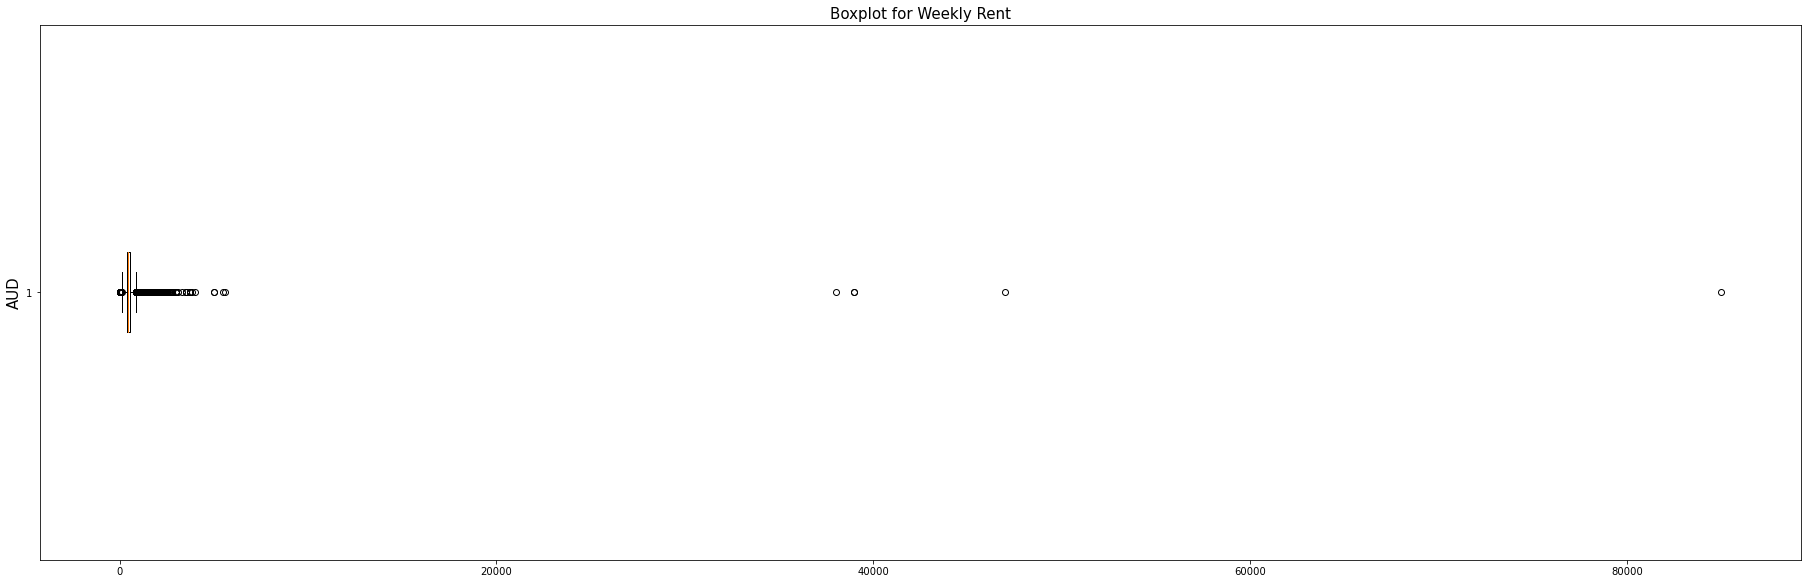

In [4]:
#Using Boxplot to find the outliers for numerical attributes
fig, axs = plt.subplots(1,1, figsize=(25,8),squeeze=False,constrained_layout = True)
axs[0,0].boxplot(property_df["rent_weekly"], vert=False)
axs[0,0].set_title('Boxplot for Weekly Rent',fontsize=15)
axs[0,0].set_ylabel("AUD",fontsize=15)
plt.show()
fig.figure.savefig('../plots/boxplot_before.png')

/Users/lucinda/opt/anaconda3/envs/ads_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'weekly rent distribution'}, xlabel='rent_weekly', ylabel='Density'>

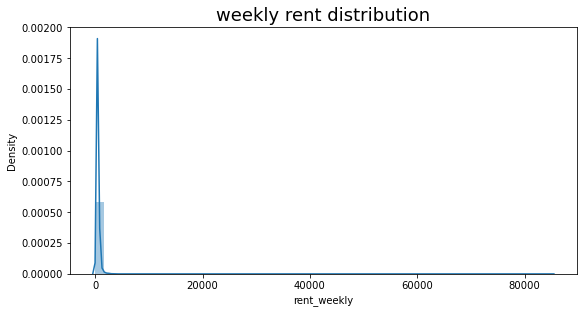

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('weekly rent distribution', fontsize=18)
sns.distplot(property_df['rent_weekly'])

In [6]:
property_df["rent_weekly"].describe()

count    14505.000000
mean       531.953326
std       1008.667255
min          1.000000
25%        385.000000
50%        450.000000
75%        570.000000
max      85000.000000
Name: rent_weekly, dtype: float64

In [7]:
Q1 = property_df["rent_weekly"].quantile(0.25)
Q3 = property_df["rent_weekly"].quantile(0.75)
IQR = Q3 - Q1
property_df = property_df[~((property_df["rent_weekly"] < (Q1 - 1.5 * IQR)) | (property_df["rent_weekly"] > (Q3 + 1.5 * IQR)))]
property_df = property_df.reset_index(drop=True)

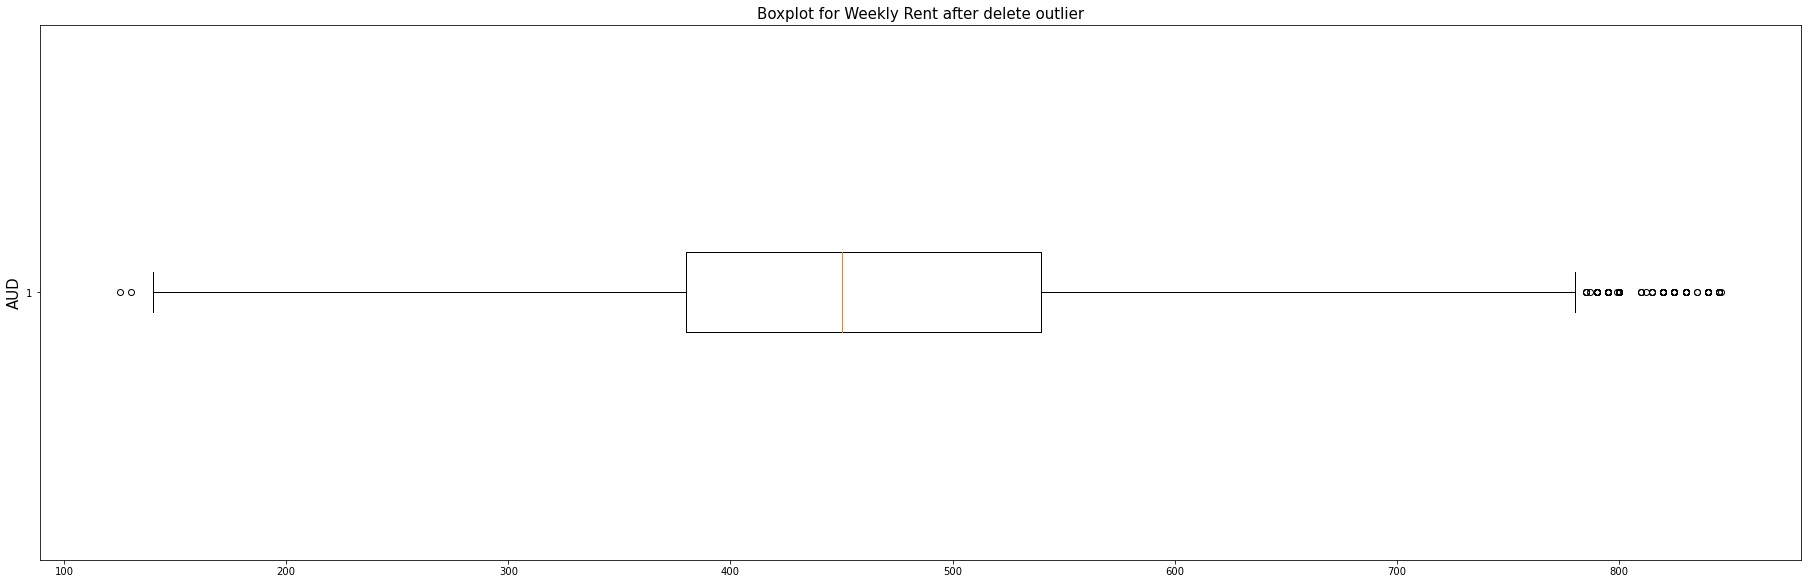

In [8]:
#Using Boxplot to find the outliers for numerical attributes
fig, axs = plt.subplots(1,1, figsize=(25,8),squeeze=False,constrained_layout = True)
axs[0,0].boxplot(property_df["rent_weekly"], vert=False)
axs[0,0].set_title('Boxplot for Weekly Rent after delete outlier',fontsize=15)
axs[0,0].set_ylabel("AUD",fontsize=15)
plt.show()
fig.figure.savefig('../plots/boxplot_after.png')

/Users/lucinda/opt/anaconda3/envs/ads_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'weekly rent distribution after delete outlier'}, xlabel='rent_weekly', ylabel='Density'>

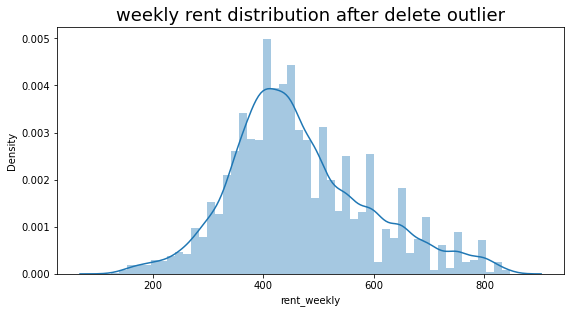

In [9]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.title('weekly rent distribution after delete outlier', fontsize=18)
sns.distplot(property_df['rent_weekly'])

In [10]:
property_df.to_csv("../data/curated/data_delete_outlier.csv",index=False)

In [11]:
property_df.shape

(13455, 110)

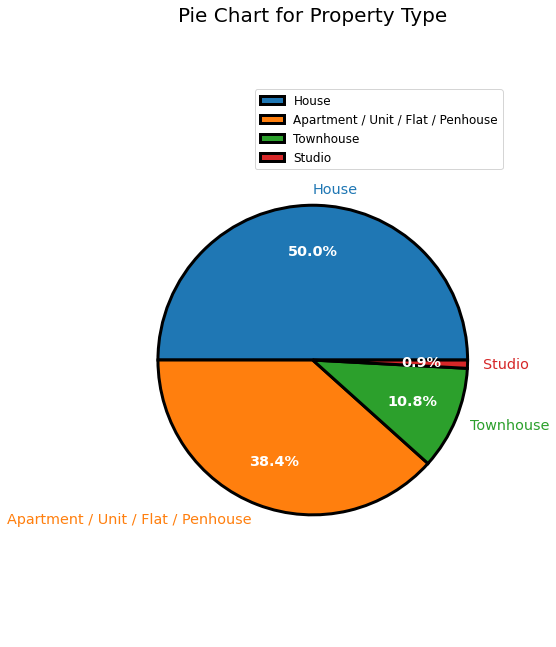

In [12]:
pie_data = property_df['type'].value_counts()
labels = pie_data.index
sizes = pie_data.values
#get label and size
fig, ax = plt.subplots(figsize = (10,9))
#draw the pie char and modify the pie chart
patches, texts, pcts = ax.pie(pie_data ,explode=None,autopct='%1.1f%%',
                               pctdistance = 0.7, labels=labels,wedgeprops={'linewidth': 3.0, 'edgecolor': 'black'},
                               textprops={'size': 'x-large'})

plt.setp(pcts, color='white', fontweight='bold')  #label color
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.legend(labels,prop={'size': 12},bbox_to_anchor=(1.0, 1.0))
plt.title("Pie Chart for Property Type", x=0.5, y=1.1,fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

fig.figure.savefig('../plots/type_pie.png')

In [13]:
property_df['counts'] = 1

In [14]:
count_number = property_df.groupby('suburb').agg('count')[['counts']].reset_index()
count_number

,suburb,counts
0,ABBOTSFORD,40
1,ABERFELDIE,11
2,ADAMS ESTATE,6
3,ADDINGTON,4
4,ADELAIDE LEAD,1
...,...,...
565,YARRAGON,1
566,YARRAM,1
567,YARRAVILLE,65
568,YARRAWONGA,16


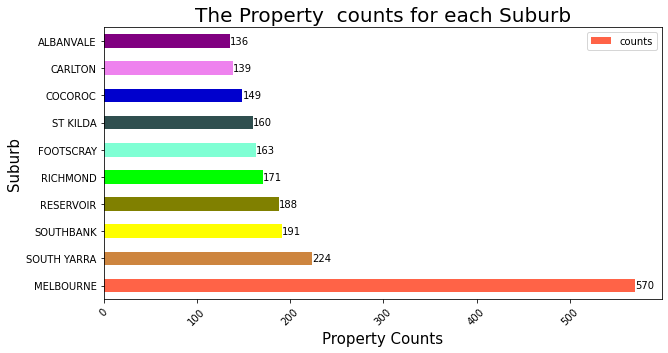

In [15]:
data = count_number.sort_values(by=['counts'], ascending=False).head(10)

#Bar char for visualize how many property are rent in suburb
fig = data.plot.barh(x="suburb", y="counts",figsize=(10,5),
                     color=['tomato', 'peru', 'yellow', 'olive', 'lime', 'aquamarine',
                            'darkslategray', 'mediumblue', 'violet', 'purple'])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation =45)
plt.ylabel('Suburb', fontsize=15)
plt.xlabel("Property Counts", fontsize=15)
plt.title("The Property  counts for each Suburb", size=20)
fig.bar_label(fig.containers[0])
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()
fig.figure.savefig('../plots/property_count.png')

In [16]:
mean_suburb = property_df.groupby('suburb').agg('mean')[['rent_weekly']].reset_index()
mean_suburb

,suburb,rent_weekly
0,ABBOTSFORD,571.875000
1,ABERFELDIE,490.454545
2,ADAMS ESTATE,470.833333
3,ADDINGTON,388.750000
4,ADELAIDE LEAD,380.000000
...,...,...
565,YARRAGON,420.000000
566,YARRAM,585.000000
567,YARRAVILLE,437.907692
568,YARRAWONGA,386.562500


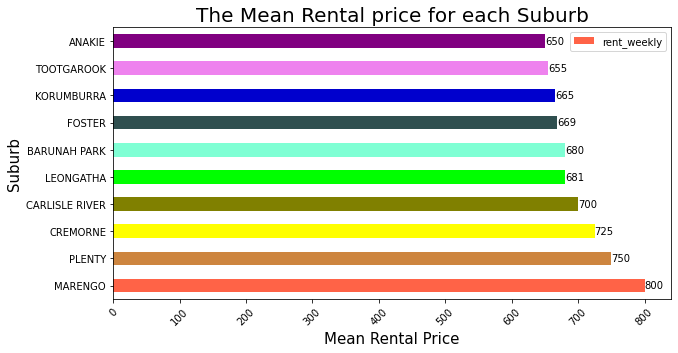

In [17]:
data = mean_suburb.sort_values(by=['rent_weekly'], ascending=False).head(10)

#Bar char for visualize how many property are rent in suburb
fig = data.plot.barh(x="suburb", y="rent_weekly",figsize=(10,5),
                     color=['tomato', 'peru', 'yellow', 'olive', 'lime', 'aquamarine', 'darkslategray',
                            'mediumblue', 'violet', 'purple'])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation =45)
plt.ylabel('Suburb', fontsize=15)
plt.xlabel("Mean Rental Price", fontsize=15)
plt.title("The Mean Rental price for each Suburb", size=20)
fig.bar_label(fig.containers[0])
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()
fig.figure.savefig('../plots/suburb_mean_desc.png')

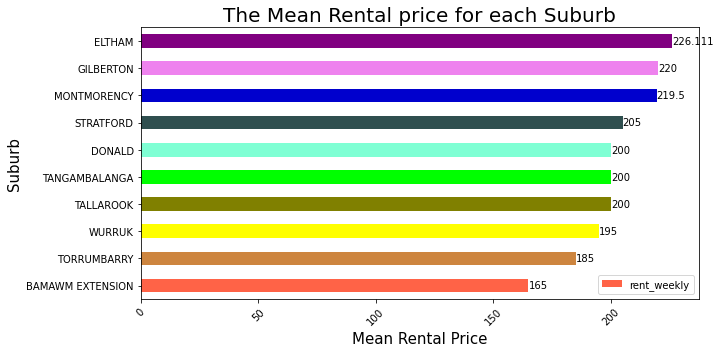

In [18]:
data = mean_suburb.sort_values(by=['rent_weekly'], ascending=True).head(10)

#Bar char for visualize how many property are rent in suburb
fig = data.plot.barh(x="suburb", y="rent_weekly",figsize=(10,5),
                     color=['tomato', 'peru', 'yellow', 'olive', 'lime', 'aquamarine', 'darkslategray',
                            'mediumblue', 'violet', 'purple'])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation =45)
plt.ylabel('Suburb', fontsize=15)
plt.xlabel("Mean Rental Price", fontsize=15)
plt.title("The Mean Rental price for each Suburb", size=20)
fig.bar_label(fig.containers[0])
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()
fig.figure.savefig('../plots/suburb_mean_asce.png')

In [19]:
property_df['type']= property_df['type'].replace('Townhouse','House')

In [20]:
apa = property_df[property_df['type'] == 'Apartment / Unit / Flat / Penhouse']
house = property_df[property_df['type'] == 'House']

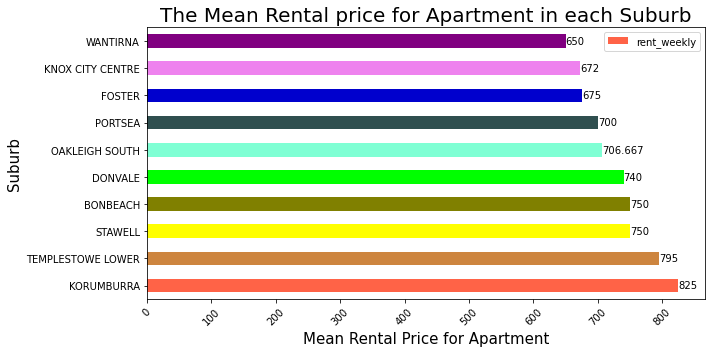

In [22]:
mean_suburb = apa.groupby('suburb').agg('mean')[['rent_weekly']].reset_index()
data = mean_suburb.sort_values(by=['rent_weekly'], ascending=False).head(10)

#Bar char for visualize how many property are rent in suburb
fig = data.plot.barh(x="suburb", y="rent_weekly",figsize=(10,5),
                     color=['tomato', 'peru', 'yellow', 'olive', 'lime', 'aquamarine', 'darkslategray',
                            'mediumblue', 'violet', 'purple'])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation =45)
plt.ylabel('Suburb', fontsize=15)
plt.xlabel("Mean Rental Price for Apartment", fontsize=15)
plt.title("The Mean Rental price for Apartment in each Suburb", size=20)
fig.bar_label(fig.containers[0])
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()
fig.figure.savefig('../plots/apa_suburb_mean_desc.png')

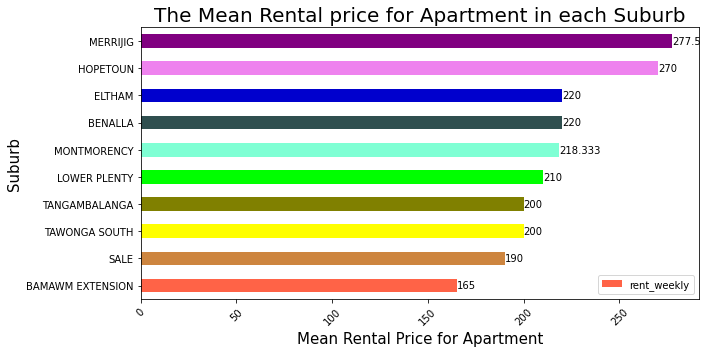

In [23]:
mean_suburb = apa.groupby('suburb').agg('mean')[['rent_weekly']].reset_index()
data = mean_suburb.sort_values(by=['rent_weekly'], ascending=True).head(10)

#Bar char for visualize how many property are rent in suburb
fig = data.plot.barh(x="suburb", y="rent_weekly",figsize=(10,5),
                     color=['tomato', 'peru', 'yellow', 'olive', 'lime', 'aquamarine', 'darkslategray',
                            'mediumblue', 'violet', 'purple'])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation =45)
plt.ylabel('Suburb', fontsize=15)
plt.xlabel("Mean Rental Price for Apartment", fontsize=15)
plt.title("The Mean Rental price for Apartment in each Suburb", size=20)
fig.bar_label(fig.containers[0])
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()
fig.figure.savefig('../plots/apa_suburb_mean_asce.png')

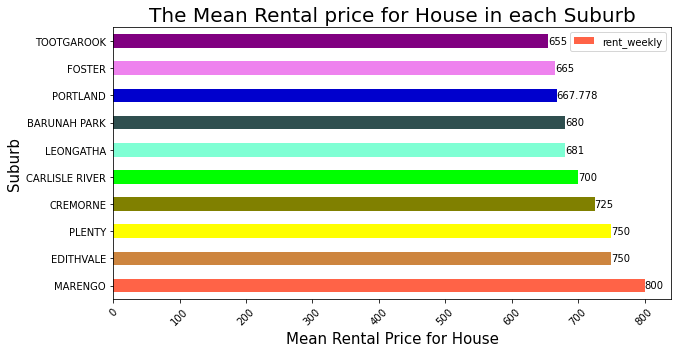

In [24]:
mean_suburb = house.groupby('suburb').agg('mean')[['rent_weekly']].reset_index()
data = mean_suburb.sort_values(by=['rent_weekly'], ascending=False).head(10)

#Bar char for visualize how many property are rent in suburb
fig = data.plot.barh(x="suburb", y="rent_weekly",figsize=(10,5),
                     color=['tomato', 'peru', 'yellow', 'olive', 'lime', 'aquamarine', 'darkslategray',
                            'mediumblue', 'violet', 'purple'])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation =45)
plt.ylabel('Suburb', fontsize=15)
plt.xlabel("Mean Rental Price for House", fontsize=15)
plt.title("The Mean Rental price for House in each Suburb", size=20)
fig.bar_label(fig.containers[0])
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()
fig.figure.savefig('../plots/house_suburb_mean_desc.png')

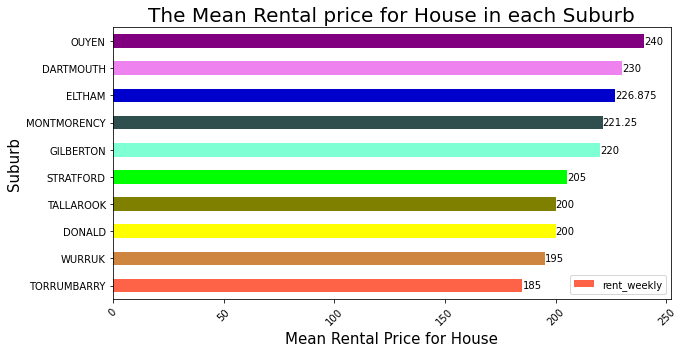

In [25]:
mean_suburb = house.groupby('suburb').agg('mean')[['rent_weekly']].reset_index()
data = mean_suburb.sort_values(by=['rent_weekly'], ascending=True).head(10)

#Bar char for visualize how many property are rent in suburb
fig = data.plot.barh(x="suburb", y="rent_weekly",figsize=(10,5),
                     color=['tomato', 'peru', 'yellow', 'olive', 'lime', 'aquamarine', 'darkslategray',
                            'mediumblue', 'violet', 'purple'])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xticks(rotation =45)
plt.ylabel('Suburb', fontsize=15)
plt.xlabel("Mean Rental Price for House", fontsize=15)
plt.title("The Mean Rental price for House in each Suburb", size=20)
fig.bar_label(fig.containers[0])
#plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()
fig.figure.savefig('../plots/house_suburb_mean_asce.png')

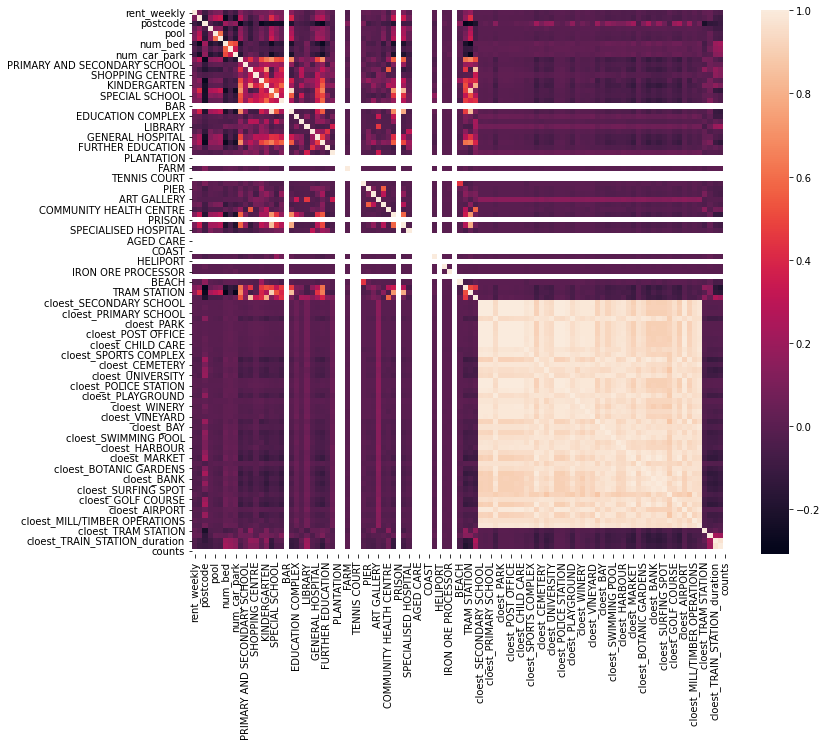

In [26]:
# Pearson correlation
fig, ax = plt.subplots(figsize = (12,10))
fig = sns.heatmap(property_df.corr())
fig.figure.savefig('../plots/heatmap.png',bbox_inches = 'tight')

In [27]:
property_df.corr().abs().iloc[0].to_frame().sort_values(by=['rent_weekly'],ascending=False).head(20)

,rent_weekly
rent_weekly,1.000000
TRAM STATION,0.174567
POST OFFICE,0.154241
POLICE STATION,0.148589
SPORTS COMPLEX,0.137243
MARKET,0.123225
GENERAL HOSPITAL,0.119532
SECONDARY SCHOOL,0.118820
TRAIN STATION,0.115931
gym,0.109401


In [28]:
def convert_suburb(df):
    suburb_lis = list(df['suburb'].unique())
    for i in range(1,len(suburb_lis)+1):
        df['suburb'] = df['suburb'].replace(suburb_lis[i-1],i)
    return df

property_df['type'] = property_df['type'].replace('Apartment / Unit / Flat / Penhouse', 1)
property_df['type'] = property_df['type'].replace('Studio', 2)
property_df['type'] = property_df['type'].replace('House', 3)
property_df = convert_suburb(property_df)

property_df = property_df.drop(columns=['postcode'])

In [29]:
print(list(property_df.columns))

['address', 'rent_weekly', 'floor', 'suburb', 'type', 'furnitured', 'pool', 'gym', 'num_bed', 'num_bath', 'num_car_park', 'coordinates', 'SECONDARY SCHOOL', 'PRIMARY AND SECONDARY SCHOOL', 'PRIMARY SCHOOL', 'SHOPPING CENTRE', 'PARK', 'KINDERGARTEN', 'POST OFFICE', 'SPECIAL SCHOOL', 'CHILD CARE', 'BAR', 'SPORTS COMPLEX', 'EDUCATION COMPLEX', 'CEMETERY', 'LIBRARY', 'UNIVERSITY', 'GENERAL HOSPITAL', 'POLICE STATION', 'FURTHER EDUCATION', 'PLAYGROUND', 'PLANTATION', 'WINERY', 'FARM', 'VINEYARD', 'TENNIS COURT', 'BAY', 'PIER', 'SWIMMING POOL', 'ART GALLERY', 'HARBOUR', 'COMMUNITY HEALTH CENTRE', 'MARKET', 'PRISON', 'BOTANIC GARDENS', 'SPECIALISED HOSPITAL', 'BANK', 'AGED CARE', 'SURFING SPOT', 'COAST', 'GOLF COURSE', 'HELIPORT', 'AIRPORT', 'IRON ORE PROCESSOR', 'MILL/TIMBER OPERATIONS', 'BEACH', 'TRAIN STATION', 'TRAM STATION', 'BUS', 'cloest_train_station', 'cloest_SECONDARY SCHOOL', 'cloest_PRIMARY AND SECONDARY SCHOOL', 'cloest_PRIMARY SCHOOL', 'cloest_SHOPPING CENTRE', 'cloest_PARK', 'c

In [30]:
internal = property_df[['address', 'rent_weekly', 'floor', 'suburb', 'type', 'furnitured', 'pool', 'gym', 'num_bed', 'num_bath', 'num_car_park']]
external = property_df[['address', 'rent_weekly','SECONDARY SCHOOL', 'PRIMARY AND SECONDARY SCHOOL', 'PRIMARY SCHOOL', 'SHOPPING CENTRE', 'PARK', 'KINDERGARTEN', 'POST OFFICE', 'SPECIAL SCHOOL', 'CHILD CARE', 'BAR', 'SPORTS COMPLEX', 'EDUCATION COMPLEX', 'CEMETERY', 'LIBRARY', 'UNIVERSITY', 'GENERAL HOSPITAL', 'POLICE STATION', 'FURTHER EDUCATION', 'PLAYGROUND', 'PLANTATION', 'WINERY', 'FARM', 'VINEYARD', 'TENNIS COURT', 'BAY', 'PIER', 'SWIMMING POOL', 'ART GALLERY', 'HARBOUR', 'COMMUNITY HEALTH CENTRE', 'MARKET', 'PRISON', 'BOTANIC GARDENS', 'SPECIALISED HOSPITAL', 'BANK', 'AGED CARE', 'SURFING SPOT', 'COAST', 'GOLF COURSE', 'HELIPORT', 'AIRPORT', 'IRON ORE PROCESSOR', 'MILL/TIMBER OPERATIONS', 'BEACH', 'TRAIN STATION', 'TRAM STATION', 'BUS', 'cloest_train_station', 'cloest_SECONDARY SCHOOL', 'cloest_PRIMARY AND SECONDARY SCHOOL', 'cloest_PRIMARY SCHOOL', 'cloest_SHOPPING CENTRE', 'cloest_PARK', 'cloest_KINDERGARTEN', 'cloest_POST OFFICE', 'cloest_SPECIAL SCHOOL', 'cloest_CHILD CARE', 'cloest_BAR', 'cloest_SPORTS COMPLEX', 'cloest_EDUCATION COMPLEX', 'cloest_CEMETERY', 'cloest_LIBRARY', 'cloest_UNIVERSITY', 'cloest_GENERAL HOSPITAL', 'cloest_POLICE STATION', 'cloest_FURTHER EDUCATION', 'cloest_PLAYGROUND', 'cloest_PLANTATION', 'cloest_WINERY', 'cloest_FARM', 'cloest_VINEYARD', 'cloest_TENNIS COURT', 'cloest_BAY', 'cloest_PIER', 'cloest_SWIMMING POOL', 'cloest_ART GALLERY', 'cloest_HARBOUR', 'cloest_COMMUNITY HEALTH CENTRE', 'cloest_MARKET', 'cloest_PRISON', 'cloest_BOTANIC GARDENS', 'cloest_SPECIALISED HOSPITAL', 'cloest_BANK', 'cloest_AGED CARE', 'cloest_SURFING SPOT', 'cloest_COAST', 'cloest_GOLF COURSE', 'cloest_HELIPORT', 'cloest_AIRPORT', 'cloest_IRON ORE PROCESSOR', 'cloest_MILL/TIMBER OPERATIONS', 'cloest_BEACH', 'cloest_TRAM STATION', 'cloest_BUS', 'cloest_TRAIN_STATION', 'cloest_TRAIN_STATION_duration', 'cloest_TRAIN_STATION_distance']]

In [31]:
internal.corr().abs().iloc[0].to_frame().sort_values(by=['rent_weekly'],ascending=False)

,rent_weekly
rent_weekly,1.000000
type,0.120412
gym,0.109401
floor,0.101841
num_bed,0.093900
pool,0.091041
suburb,0.087228
num_car_park,0.082851
furnitured,0.036077
num_bath,0.025824


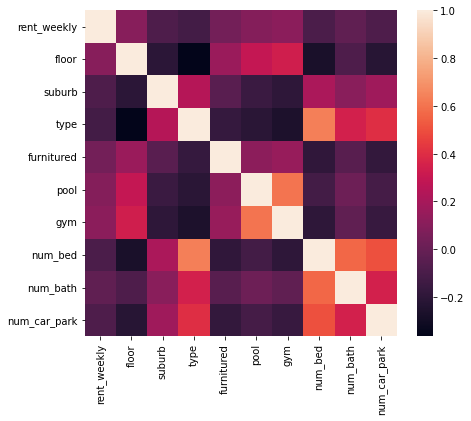

In [32]:
# Pearson correlation
fig, ax = plt.subplots(figsize = (7,6))
fig = sns.heatmap(internal.corr())
fig.figure.savefig('../plots/heatmap_internal.png',bbox_inches = 'tight')

In [33]:
internal[internal['type'] == 1].corr().abs().iloc[0].to_frame().sort_values(by=['rent_weekly'],ascending=False)

,rent_weekly
rent_weekly,1.000000
suburb,0.140465
gym,0.126772
pool,0.102632
floor,0.101654
num_car_park,0.052256
num_bath,0.049523
num_bed,0.041645
furnitured,0.037907
type,NaN


In [34]:
internal[internal['type'] == 3].corr().abs().iloc[0].to_frame().sort_values(by=['rent_weekly'],ascending=False)

,rent_weekly
rent_weekly,1.000000
num_car_park,0.032713
pool,0.023810
suburb,0.023093
num_bed,0.015205
floor,0.008797
gym,0.008449
furnitured,0.003345
num_bath,0.002202
type,NaN


In [43]:
external.corr().abs().iloc[0].to_frame().sort_values(by=['rent_weekly'],ascending=False).head(15)

,rent_weekly
rent_weekly,1.000000
TRAM STATION,0.174567
POST OFFICE,0.154241
POLICE STATION,0.148589
SPORTS COMPLEX,0.137243
MARKET,0.123225
GENERAL HOSPITAL,0.119532
SECONDARY SCHOOL,0.118820
TRAIN STATION,0.115931
BOTANIC GARDENS,0.100427


In [44]:
external.columns

Index(['address', 'rent_weekly', 'SECONDARY SCHOOL',
       'PRIMARY AND SECONDARY SCHOOL', 'PRIMARY SCHOOL', 'SHOPPING CENTRE',
       'PARK', 'KINDERGARTEN', 'POST OFFICE', 'SPECIAL SCHOOL', 'CHILD CARE',
       'BAR', 'SPORTS COMPLEX', 'EDUCATION COMPLEX', 'CEMETERY', 'LIBRARY',
       'UNIVERSITY', 'GENERAL HOSPITAL', 'POLICE STATION', 'FURTHER EDUCATION',
       'PLAYGROUND', 'PLANTATION', 'WINERY', 'FARM', 'VINEYARD',
       'TENNIS COURT', 'BAY', 'PIER', 'SWIMMING POOL', 'ART GALLERY',
       'HARBOUR', 'COMMUNITY HEALTH CENTRE', 'MARKET', 'PRISON',
       'BOTANIC GARDENS', 'SPECIALISED HOSPITAL', 'BANK', 'AGED CARE',
       'SURFING SPOT', 'COAST', 'GOLF COURSE', 'HELIPORT', 'AIRPORT',
       'IRON ORE PROCESSOR', 'MILL/TIMBER OPERATIONS', 'BEACH',
       'TRAIN STATION', 'TRAM STATION', 'BUS', 'cloest_train_station',
       'cloest_SECONDARY SCHOOL', 'cloest_PRIMARY AND SECONDARY SCHOOL',
       'cloest_PRIMARY SCHOOL', 'cloest_SHOPPING CENTRE', 'cloest_PARK',
       'cloest_

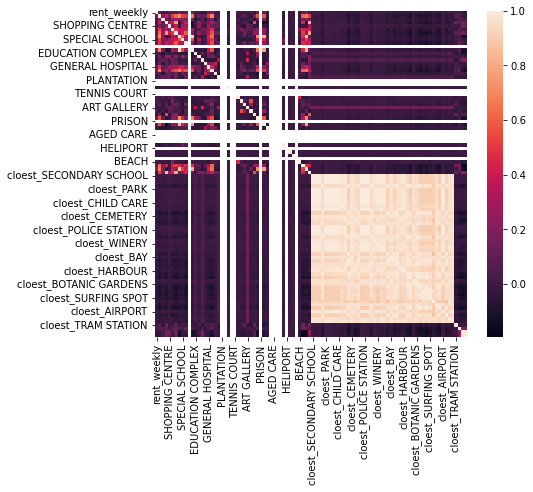

In [36]:
# Pearson correlation
fig, ax = plt.subplots(figsize = (7,6))
fig = sns.heatmap(external.corr())
fig.figure.savefig('../plots/heatmap_internal.png',bbox_inches = 'tight')

In [37]:
property_df['type'].unique()

array([1, 2, 3])

In [38]:
affordable = pd.read_csv('../data/curated/affordable.csv')
affordable

,LGA,Percent_1r_Mar_2000,Percent_1r_Jun_2000,Percent_1r_Sep_2000,Percent_1r_Dec_2000,Percent_1r_Mar_2001,Percent_1r_Jun_2001,Percent_1r_Sep_2001,Percent_1r_Dec_2001,Percent_1r_Mar_2002,...,Percent_total_Jun_2019,Percent_total_Sep_2019,Percent_total_Dec_2019,Percent_total_Mar_2020,Percent_total_Jun_2020,Percent_total_Sep_2020,Percent_total_Dec_2020,Percent_total_Mar_2021,Percent_total_Jun_2021,Percent_total_Sep_2021
0,Alpine,1.000,0.400,1.000,1.000,1.000,0.800,1.000,0.500,1.000,...,0.455,0.444,0.529,0.413,0.453,0.480,0.278,0.306,0.218,0.284
1,Ararat,1.000,1.000,1.000,1.000,1.000,1.000,0.667,1.000,1.000,...,0.684,0.781,0.716,0.743,0.767,0.667,0.610,0.552,0.588,0.576
2,Ballarat,0.918,0.860,0.902,0.968,0.915,0.931,0.940,0.877,0.880,...,0.486,0.521,0.473,0.464,0.570,0.524,0.439,0.390,0.477,0.490
3,Banyule,0.089,0.094,0.079,0.167,0.091,0.100,0.036,0.119,0.130,...,0.025,0.025,0.021,0.015,0.020,0.024,0.022,0.029,0.035,0.046
4,Bass Coast,0.571,0.833,0.200,0.364,0.600,0.500,0.625,0.429,0.500,...,0.425,0.458,0.346,0.320,0.457,0.319,0.296,0.156,0.192,0.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Yarra Ranges,0.122,0.079,0.143,0.339,0.370,0.222,0.113,0.360,0.184,...,0.054,0.023,0.040,0.024,0.039,0.042,0.039,0.056,0.052,0.048
78,Yarriambiack,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,0.955,1.000,0.952,1.000
79,Table Total,0.186,0.169,0.192,0.262,0.240,0.231,0.192,0.195,0.163,...,0.132,0.142,0.139,0.115,0.161,0.146,0.115,0.097,0.130,0.143
80,Metro,0.059,0.047,0.078,0.130,0.113,0.105,0.064,0.070,0.053,...,0.059,0.073,0.071,0.058,0.087,0.078,0.071,0.061,0.093,0.107


In [39]:
affordable = affordable.sort_values(by=['Percent_total_Sep_2021'], ascending=False)
affordable.head(15)

,LGA,Percent_1r_Mar_2000,Percent_1r_Jun_2000,Percent_1r_Sep_2000,Percent_1r_Dec_2000,Percent_1r_Mar_2001,Percent_1r_Jun_2001,Percent_1r_Sep_2001,Percent_1r_Dec_2001,Percent_1r_Mar_2002,...,Percent_total_Jun_2019,Percent_total_Sep_2019,Percent_total_Dec_2019,Percent_total_Mar_2020,Percent_total_Jun_2020,Percent_total_Sep_2020,Percent_total_Dec_2020,Percent_total_Mar_2021,Percent_total_Jun_2021,Percent_total_Sep_2021
10,Buloke,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.944,0.923,1.000,1.000,1.000,0.933,0.941,0.933,1.000,1.000
78,Yarriambiack,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,0.955,1.000,0.952,1.000
20,Gannawarra,1.000,1.000,0.750,1.000,1.000,1.000,1.000,1.000,1.000,...,0.982,0.959,0.964,0.944,0.968,0.957,0.951,1.000,0.926,1.000
71,West Wimmera,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.833,0.923,1.000
29,Hindmarsh,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,...,0.917,1.000,0.955,0.923,1.000,0.962,0.833,0.952,0.893,0.964
14,Central Goldfields,0.750,1.000,1.000,1.000,1.000,1.000,1.000,0.833,1.000,...,0.818,0.857,0.919,0.825,0.862,0.837,0.706,0.882,0.767,0.821
57,Northern Grampians,0.909,1.000,0.917,1.000,1.000,1.000,0.692,1.000,1.000,...,0.821,0.846,0.855,0.841,0.850,0.805,0.702,0.773,0.795,0.806
37,Loddon,1.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,...,1.000,1.000,1.000,0.875,1.000,0.833,0.909,1.000,0.833,0.800
62,Southern Grampians,0.909,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.739,0.845,0.800,0.750,0.782,0.817,0.676,0.556,0.627,0.710
66,Swan Hill,0.903,0.789,0.952,0.875,1.000,0.929,0.957,1.000,0.864,...,0.739,0.835,0.655,0.550,0.610,0.636,0.562,0.486,0.516,0.687


In [ ]:
affordable['LGA'].unique()

In [ ]:
match = pd.read_csv

In [ ]:
# read rental data
path = os.getcwd().replace("notebooks","") + "data/curated/"
df = pd.read_csv(path+'rental_median.csv', low_memory = True)
df = df.drop_duplicates()
df = df[['Suburb','Rental_total_Mar_2000_1b_flat', 'Rental_total_Jun_2000_1b_flat', 'Rental_total_Sep_2000_1b_flat', 'Rental_total_Dec_2000_1b_flat', 'Rental_total_Mar_2001_1b_flat', 'Rental_total_Jun_2001_1b_flat', 'Rental_total_Sep_2001_1b_flat', 'Rental_total_Dec_2001_1b_flat', 'Rental_total_Mar_2002_1b_flat', 'Rental_total_Jun_2002_1b_flat', 'Rental_total_Sep_2002_1b_flat', 'Rental_total_Dec_2002_1b_flat', 'Rental_total_Mar_2003_1b_flat', 'Rental_total_Jun_2003_1b_flat', 'Rental_total_Sep_2003_1b_flat', 'Rental_total_Dec_2003_1b_flat', 'Rental_total_Mar_2004_1b_flat', 'Rental_total_Jun_2004_1b_flat', 'Rental_total_Sep_2004_1b_flat', 'Rental_total_Dec_2004_1b_flat', 'Rental_total_Mar_2005_1b_flat', 'Rental_total_Jun_2005_1b_flat', 'Rental_total_Sep_2005_1b_flat', 'Rental_total_Dec_2005_1b_flat', 'Rental_total_Mar_2006_1b_flat', 'Rental_total_Jun_2006_1b_flat', 'Rental_total_Sep_2006_1b_flat', 'Rental_total_Dec_2006_1b_flat', 'Rental_total_Mar_2007_1b_flat', 'Rental_total_Jun_2007_1b_flat', 'Rental_total_Sep_2007_1b_flat', 'Rental_total_Dec_2007_1b_flat', 'Rental_total_Mar_2008_1b_flat', 'Rental_total_Jun_2008_1b_flat', 'Rental_total_Sep_2008_1b_flat', 'Rental_total_Dec_2008_1b_flat', 'Rental_total_Mar_2009_1b_flat', 'Rental_total_Jun_2009_1b_flat', 'Rental_total_Sep_2009_1b_flat', 'Rental_total_Dec_2009_1b_flat', 'Rental_total_Mar_2010_1b_flat', 'Rental_total_Jun_2010_1b_flat', 'Rental_total_Sep_2010_1b_flat', 'Rental_total_Dec_2010_1b_flat', 'Rental_total_Mar_2011_1b_flat', 'Rental_total_Jun_2011_1b_flat', 'Rental_total_Sep_2011_1b_flat', 'Rental_total_Dec_2011_1b_flat', 'Rental_total_Mar_2012_1b_flat', 'Rental_total_Jun_2012_1b_flat', 'Rental_total_Sep_2012_1b_flat', 'Rental_total_Dec_2012_1b_flat', 'Rental_total_Mar_2013_1b_flat', 'Rental_total_Jun_2013_1b_flat', 'Rental_total_Sep_2013_1b_flat', 'Rental_total_Dec_2013_1b_flat', 'Rental_total_Mar_2014_1b_flat', 'Rental_total_Jun_2014_1b_flat', 'Rental_total_Sep_2014_1b_flat', 'Rental_total_Dec_2014_1b_flat', 'Rental_total_Mar_2015_1b_flat', 'Rental_total_Jun_2015_1b_flat', 'Rental_total_Sep_2015_1b_flat', 'Rental_total_Dec_2015_1b_flat', 'Rental_total_Mar_2016_1b_flat', 'Rental_total_Jun_2016_1b_flat', 'Rental_total_Sep_2016_1b_flat', 'Rental_total_Dec_2016_1b_flat', 'Rental_total_Mar_2017_1b_flat', 'Rental_total_Jun_2017_1b_flat', 'Rental_total_Sep_2017_1b_flat', 'Rental_total_Dec_2017_1b_flat', 'Rental_total_Mar_2018_1b_flat', 'Rental_total_Jun_2018_1b_flat', 'Rental_total_Sep_2018_1b_flat', 'Rental_total_Dec_2018_1b_flat', 'Rental_total_Mar_2019_1b_flat', 'Rental_total_Jun_2019_1b_flat', 'Rental_total_Sep_2019_1b_flat', 'Rental_total_Dec_2019_1b_flat', 'Rental_total_Mar_2020_1b_flat', 'Rental_total_Jun_2020_1b_flat', 'Rental_total_Sep_2020_1b_flat', 'Rental_total_Dec_2020_1b_flat', 'Rental_total_Mar_2021_1b_flat', 'Rental_total_Jun_2021_1b_flat', 'Rental_total_Mar_2000_2b_flat', 'Rental_total_Jun_2000_2b_flat', 'Rental_total_Sep_2000_2b_flat', 'Rental_total_Dec_2000_2b_flat', 'Rental_total_Mar_2001_2b_flat', 'Rental_total_Jun_2001_2b_flat', 'Rental_total_Sep_2001_2b_flat', 'Rental_total_Dec_2001_2b_flat', 'Rental_total_Mar_2002_2b_flat', 'Rental_total_Jun_2002_2b_flat', 'Rental_total_Sep_2002_2b_flat', 'Rental_total_Dec_2002_2b_flat', 'Rental_total_Mar_2003_2b_flat', 'Rental_total_Jun_2003_2b_flat', 'Rental_total_Sep_2003_2b_flat', 'Rental_total_Dec_2003_2b_flat', 'Rental_total_Mar_2004_2b_flat', 'Rental_total_Jun_2004_2b_flat', 'Rental_total_Sep_2004_2b_flat', 'Rental_total_Dec_2004_2b_flat', 'Rental_total_Mar_2005_2b_flat', 'Rental_total_Jun_2005_2b_flat', 'Rental_total_Sep_2005_2b_flat', 'Rental_total_Dec_2005_2b_flat', 'Rental_total_Mar_2006_2b_flat', 'Rental_total_Jun_2006_2b_flat', 'Rental_total_Sep_2006_2b_flat', 'Rental_total_Dec_2006_2b_flat', 'Rental_total_Mar_2007_2b_flat', 'Rental_total_Jun_2007_2b_flat', 'Rental_total_Sep_2007_2b_flat', 'Rental_total_Dec_2007_2b_flat', 'Rental_total_Mar_2008_2b_flat', 'Rental_total_Jun_2008_2b_flat', 'Rental_total_Sep_2008_2b_flat', 'Rental_total_Dec_2008_2b_flat', 'Rental_total_Mar_2009_2b_flat', 'Rental_total_Jun_2009_2b_flat', 'Rental_total_Sep_2009_2b_flat', 'Rental_total_Dec_2009_2b_flat', 'Rental_total_Mar_2010_2b_flat', 'Rental_total_Jun_2010_2b_flat', 'Rental_total_Sep_2010_2b_flat', 'Rental_total_Dec_2010_2b_flat', 'Rental_total_Mar_2011_2b_flat', 'Rental_total_Jun_2011_2b_flat', 'Rental_total_Sep_2011_2b_flat', 'Rental_total_Dec_2011_2b_flat', 'Rental_total_Mar_2012_2b_flat', 'Rental_total_Jun_2012_2b_flat', 'Rental_total_Sep_2012_2b_flat', 'Rental_total_Dec_2012_2b_flat', 'Rental_total_Mar_2013_2b_flat', 'Rental_total_Jun_2013_2b_flat', 'Rental_total_Sep_2013_2b_flat', 'Rental_total_Dec_2013_2b_flat', 'Rental_total_Mar_2014_2b_flat', 'Rental_total_Jun_2014_2b_flat', 'Rental_total_Sep_2014_2b_flat', 'Rental_total_Dec_2014_2b_flat', 'Rental_total_Mar_2015_2b_flat', 'Rental_total_Jun_2015_2b_flat', 'Rental_total_Sep_2015_2b_flat', 'Rental_total_Dec_2015_2b_flat', 'Rental_total_Mar_2016_2b_flat', 'Rental_total_Jun_2016_2b_flat', 'Rental_total_Sep_2016_2b_flat', 'Rental_total_Dec_2016_2b_flat', 'Rental_total_Mar_2017_2b_flat', 'Rental_total_Jun_2017_2b_flat', 'Rental_total_Sep_2017_2b_flat', 'Rental_total_Dec_2017_2b_flat', 'Rental_total_Mar_2018_2b_flat', 'Rental_total_Jun_2018_2b_flat', 'Rental_total_Sep_2018_2b_flat', 'Rental_total_Dec_2018_2b_flat', 'Rental_total_Mar_2019_2b_flat', 'Rental_total_Jun_2019_2b_flat', 'Rental_total_Sep_2019_2b_flat', 'Rental_total_Dec_2019_2b_flat', 'Rental_total_Mar_2020_2b_flat', 'Rental_total_Jun_2020_2b_flat', 'Rental_total_Sep_2020_2b_flat', 'Rental_total_Dec_2020_2b_flat', 'Rental_total_Mar_2021_2b_flat', 'Rental_total_Jun_2021_2b_flat', 'Rental_total_Mar_2000_3b_flat', 'Rental_total_Jun_2000_3b_flat', 'Rental_total_Sep_2000_3b_flat', 'Rental_total_Dec_2000_3b_flat', 'Rental_total_Mar_2001_3b_flat', 'Rental_total_Jun_2001_3b_flat', 'Rental_total_Sep_2001_3b_flat', 'Rental_total_Dec_2001_3b_flat', 'Rental_total_Mar_2002_3b_flat', 'Rental_total_Jun_2002_3b_flat', 'Rental_total_Sep_2002_3b_flat', 'Rental_total_Dec_2002_3b_flat', 'Rental_total_Mar_2003_3b_flat', 'Rental_total_Jun_2003_3b_flat', 'Rental_total_Sep_2003_3b_flat', 'Rental_total_Dec_2003_3b_flat', 'Rental_total_Mar_2004_3b_flat', 'Rental_total_Jun_2004_3b_flat', 'Rental_total_Sep_2004_3b_flat', 'Rental_total_Dec_2004_3b_flat', 'Rental_total_Mar_2005_3b_flat', 'Rental_total_Jun_2005_3b_flat', 'Rental_total_Sep_2005_3b_flat', 'Rental_total_Dec_2005_3b_flat', 'Rental_total_Mar_2006_3b_flat', 'Rental_total_Jun_2006_3b_flat', 'Rental_total_Sep_2006_3b_flat', 'Rental_total_Dec_2006_3b_flat', 'Rental_total_Mar_2007_3b_flat', 'Rental_total_Jun_2007_3b_flat', 'Rental_total_Sep_2007_3b_flat', 'Rental_total_Dec_2007_3b_flat', 'Rental_total_Mar_2008_3b_flat', 'Rental_total_Jun_2008_3b_flat', 'Rental_total_Sep_2008_3b_flat', 'Rental_total_Dec_2008_3b_flat', 'Rental_total_Mar_2009_3b_flat', 'Rental_total_Jun_2009_3b_flat', 'Rental_total_Sep_2009_3b_flat', 'Rental_total_Dec_2009_3b_flat', 'Rental_total_Mar_2010_3b_flat', 'Rental_total_Jun_2010_3b_flat', 'Rental_total_Sep_2010_3b_flat', 'Rental_total_Dec_2010_3b_flat', 'Rental_total_Mar_2011_3b_flat', 'Rental_total_Jun_2011_3b_flat', 'Rental_total_Sep_2011_3b_flat', 'Rental_total_Dec_2011_3b_flat', 'Rental_total_Mar_2012_3b_flat', 'Rental_total_Jun_2012_3b_flat', 'Rental_total_Sep_2012_3b_flat', 'Rental_total_Dec_2012_3b_flat', 'Rental_total_Mar_2013_3b_flat', 'Rental_total_Jun_2013_3b_flat', 'Rental_total_Sep_2013_3b_flat', 'Rental_total_Dec_2013_3b_flat', 'Rental_total_Mar_2014_3b_flat', 'Rental_total_Jun_2014_3b_flat', 'Rental_total_Sep_2014_3b_flat', 'Rental_total_Dec_2014_3b_flat', 'Rental_total_Mar_2015_3b_flat', 'Rental_total_Jun_2015_3b_flat', 'Rental_total_Sep_2015_3b_flat', 'Rental_total_Dec_2015_3b_flat', 'Rental_total_Mar_2016_3b_flat', 'Rental_total_Jun_2016_3b_flat', 'Rental_total_Sep_2016_3b_flat', 'Rental_total_Dec_2016_3b_flat', 'Rental_total_Mar_2017_3b_flat', 'Rental_total_Jun_2017_3b_flat', 'Rental_total_Sep_2017_3b_flat', 'Rental_total_Dec_2017_3b_flat', 'Rental_total_Mar_2018_3b_flat', 'Rental_total_Jun_2018_3b_flat', 'Rental_total_Sep_2018_3b_flat', 'Rental_total_Dec_2018_3b_flat', 'Rental_total_Mar_2019_3b_flat', 'Rental_total_Jun_2019_3b_flat', 'Rental_total_Sep_2019_3b_flat', 'Rental_total_Dec_2019_3b_flat', 'Rental_total_Mar_2020_3b_flat', 'Rental_total_Jun_2020_3b_flat', 'Rental_total_Sep_2020_3b_flat', 'Rental_total_Dec_2020_3b_flat', 'Rental_total_Mar_2021_3b_flat', 'Rental_total_Jun_2021_3b_flat', 'Rental_total_Mar_2000_2b_house', 'Rental_total_Jun_2000_2b_house', 'Rental_total_Sep_2000_2b_house', 'Rental_total_Dec_2000_2b_house', 'Rental_total_Mar_2001_2b_house', 'Rental_total_Jun_2001_2b_house', 'Rental_total_Sep_2001_2b_house', 'Rental_total_Dec_2001_2b_house', 'Rental_total_Mar_2002_2b_house', 'Rental_total_Jun_2002_2b_house', 'Rental_total_Sep_2002_2b_house', 'Rental_total_Dec_2002_2b_house', 'Rental_total_Mar_2003_2b_house', 'Rental_total_Jun_2003_2b_house', 'Rental_total_Sep_2003_2b_house', 'Rental_total_Dec_2003_2b_house', 'Rental_total_Mar_2004_2b_house', 'Rental_total_Jun_2004_2b_house', 'Rental_total_Sep_2004_2b_house', 'Rental_total_Dec_2004_2b_house', 'Rental_total_Mar_2005_2b_house', 'Rental_total_Jun_2005_2b_house', 'Rental_total_Sep_2005_2b_house', 'Rental_total_Dec_2005_2b_house', 'Rental_total_Mar_2006_2b_house', 'Rental_total_Jun_2006_2b_house', 'Rental_total_Sep_2006_2b_house', 'Rental_total_Dec_2006_2b_house', 'Rental_total_Mar_2007_2b_house', 'Rental_total_Jun_2007_2b_house', 'Rental_total_Sep_2007_2b_house', 'Rental_total_Dec_2007_2b_house', 'Rental_total_Mar_2008_2b_house', 'Rental_total_Jun_2008_2b_house', 'Rental_total_Sep_2008_2b_house', 'Rental_total_Dec_2008_2b_house', 'Rental_total_Mar_2009_2b_house', 'Rental_total_Jun_2009_2b_house', 'Rental_total_Sep_2009_2b_house', 'Rental_total_Dec_2009_2b_house', 'Rental_total_Mar_2010_2b_house', 'Rental_total_Jun_2010_2b_house', 'Rental_total_Sep_2010_2b_house', 'Rental_total_Dec_2010_2b_house', 'Rental_total_Mar_2011_2b_house', 'Rental_total_Jun_2011_2b_house', 'Rental_total_Sep_2011_2b_house', 'Rental_total_Dec_2011_2b_house', 'Rental_total_Mar_2012_2b_house', 'Rental_total_Jun_2012_2b_house', 'Rental_total_Sep_2012_2b_house', 'Rental_total_Dec_2012_2b_house', 'Rental_total_Mar_2013_2b_house', 'Rental_total_Jun_2013_2b_house', 'Rental_total_Sep_2013_2b_house', 'Rental_total_Dec_2013_2b_house', 'Rental_total_Mar_2014_2b_house', 'Rental_total_Jun_2014_2b_house', 'Rental_total_Sep_2014_2b_house', 'Rental_total_Dec_2014_2b_house', 'Rental_total_Mar_2015_2b_house', 'Rental_total_Jun_2015_2b_house', 'Rental_total_Sep_2015_2b_house', 'Rental_total_Dec_2015_2b_house', 'Rental_total_Mar_2016_2b_house', 'Rental_total_Jun_2016_2b_house', 'Rental_total_Sep_2016_2b_house', 'Rental_total_Dec_2016_2b_house', 'Rental_total_Mar_2017_2b_house', 'Rental_total_Jun_2017_2b_house', 'Rental_total_Sep_2017_2b_house', 'Rental_total_Dec_2017_2b_house', 'Rental_total_Mar_2018_2b_house', 'Rental_total_Jun_2018_2b_house', 'Rental_total_Sep_2018_2b_house', 'Rental_total_Dec_2018_2b_house', 'Rental_total_Mar_2019_2b_house', 'Rental_total_Jun_2019_2b_house', 'Rental_total_Sep_2019_2b_house', 'Rental_total_Dec_2019_2b_house', 'Rental_total_Mar_2020_2b_house', 'Rental_total_Jun_2020_2b_house', 'Rental_total_Sep_2020_2b_house', 'Rental_total_Dec_2020_2b_house', 'Rental_total_Mar_2021_2b_house', 'Rental_total_Jun_2021_2b_house', 'Rental_total_Mar_2000_3b_house', 'Rental_total_Jun_2000_3b_house', 'Rental_total_Sep_2000_3b_house', 'Rental_total_Dec_2000_3b_house', 'Rental_total_Mar_2001_3b_house', 'Rental_total_Jun_2001_3b_house', 'Rental_total_Sep_2001_3b_house', 'Rental_total_Dec_2001_3b_house', 'Rental_total_Mar_2002_3b_house', 'Rental_total_Jun_2002_3b_house', 'Rental_total_Sep_2002_3b_house', 'Rental_total_Dec_2002_3b_house', 'Rental_total_Mar_2003_3b_house', 'Rental_total_Jun_2003_3b_house', 'Rental_total_Sep_2003_3b_house', 'Rental_total_Dec_2003_3b_house', 'Rental_total_Mar_2004_3b_house', 'Rental_total_Jun_2004_3b_house', 'Rental_total_Sep_2004_3b_house', 'Rental_total_Dec_2004_3b_house', 'Rental_total_Mar_2005_3b_house', 'Rental_total_Jun_2005_3b_house', 'Rental_total_Sep_2005_3b_house', 'Rental_total_Dec_2005_3b_house', 'Rental_total_Mar_2006_3b_house', 'Rental_total_Jun_2006_3b_house', 'Rental_total_Sep_2006_3b_house', 'Rental_total_Dec_2006_3b_house', 'Rental_total_Mar_2007_3b_house', 'Rental_total_Jun_2007_3b_house', 'Rental_total_Sep_2007_3b_house', 'Rental_total_Dec_2007_3b_house', 'Rental_total_Mar_2008_3b_house', 'Rental_total_Jun_2008_3b_house', 'Rental_total_Sep_2008_3b_house', 'Rental_total_Dec_2008_3b_house', 'Rental_total_Mar_2009_3b_house', 'Rental_total_Jun_2009_3b_house', 'Rental_total_Sep_2009_3b_house', 'Rental_total_Dec_2009_3b_house', 'Rental_total_Mar_2010_3b_house', 'Rental_total_Jun_2010_3b_house', 'Rental_total_Sep_2010_3b_house', 'Rental_total_Dec_2010_3b_house', 'Rental_total_Mar_2011_3b_house', 'Rental_total_Jun_2011_3b_house', 'Rental_total_Sep_2011_3b_house', 'Rental_total_Dec_2011_3b_house', 'Rental_total_Mar_2012_3b_house', 'Rental_total_Jun_2012_3b_house', 'Rental_total_Sep_2012_3b_house', 'Rental_total_Dec_2012_3b_house', 'Rental_total_Mar_2013_3b_house', 'Rental_total_Jun_2013_3b_house', 'Rental_total_Sep_2013_3b_house', 'Rental_total_Dec_2013_3b_house', 'Rental_total_Mar_2014_3b_house', 'Rental_total_Jun_2014_3b_house', 'Rental_total_Sep_2014_3b_house', 'Rental_total_Dec_2014_3b_house', 'Rental_total_Mar_2015_3b_house', 'Rental_total_Jun_2015_3b_house', 'Rental_total_Sep_2015_3b_house', 'Rental_total_Dec_2015_3b_house', 'Rental_total_Mar_2016_3b_house', 'Rental_total_Jun_2016_3b_house', 'Rental_total_Sep_2016_3b_house', 'Rental_total_Dec_2016_3b_house', 'Rental_total_Mar_2017_3b_house', 'Rental_total_Jun_2017_3b_house', 'Rental_total_Sep_2017_3b_house', 'Rental_total_Dec_2017_3b_house', 'Rental_total_Mar_2018_3b_house', 'Rental_total_Jun_2018_3b_house', 'Rental_total_Sep_2018_3b_house', 'Rental_total_Dec_2018_3b_house', 'Rental_total_Mar_2019_3b_house', 'Rental_total_Jun_2019_3b_house', 'Rental_total_Sep_2019_3b_house', 'Rental_total_Dec_2019_3b_house', 'Rental_total_Mar_2020_3b_house', 'Rental_total_Jun_2020_3b_house', 'Rental_total_Sep_2020_3b_house', 'Rental_total_Dec_2020_3b_house', 'Rental_total_Mar_2021_3b_house', 'Rental_total_Jun_2021_3b_house', 'Rental_total_Mar_2000_4b_house', 'Rental_total_Jun_2000_4b_house', 'Rental_total_Sep_2000_4b_house', 'Rental_total_Dec_2000_4b_house', 'Rental_total_Mar_2001_4b_house', 'Rental_total_Jun_2001_4b_house', 'Rental_total_Sep_2001_4b_house', 'Rental_total_Dec_2001_4b_house', 'Rental_total_Mar_2002_4b_house', 'Rental_total_Jun_2002_4b_house', 'Rental_total_Sep_2002_4b_house', 'Rental_total_Dec_2002_4b_house', 'Rental_total_Mar_2003_4b_house', 'Rental_total_Jun_2003_4b_house', 'Rental_total_Sep_2003_4b_house', 'Rental_total_Dec_2003_4b_house', 'Rental_total_Mar_2004_4b_house', 'Rental_total_Jun_2004_4b_house', 'Rental_total_Sep_2004_4b_house', 'Rental_total_Dec_2004_4b_house', 'Rental_total_Mar_2005_4b_house', 'Rental_total_Jun_2005_4b_house', 'Rental_total_Sep_2005_4b_house', 'Rental_total_Dec_2005_4b_house', 'Rental_total_Mar_2006_4b_house', 'Rental_total_Jun_2006_4b_house', 'Rental_total_Sep_2006_4b_house', 'Rental_total_Dec_2006_4b_house', 'Rental_total_Mar_2007_4b_house', 'Rental_total_Jun_2007_4b_house', 'Rental_total_Sep_2007_4b_house', 'Rental_total_Dec_2007_4b_house', 'Rental_total_Mar_2008_4b_house', 'Rental_total_Jun_2008_4b_house', 'Rental_total_Sep_2008_4b_house', 'Rental_total_Dec_2008_4b_house', 'Rental_total_Mar_2009_4b_house', 'Rental_total_Jun_2009_4b_house', 'Rental_total_Sep_2009_4b_house', 'Rental_total_Dec_2009_4b_house', 'Rental_total_Mar_2010_4b_house', 'Rental_total_Jun_2010_4b_house', 'Rental_total_Sep_2010_4b_house', 'Rental_total_Dec_2010_4b_house', 'Rental_total_Mar_2011_4b_house', 'Rental_total_Jun_2011_4b_house', 'Rental_total_Sep_2011_4b_house', 'Rental_total_Dec_2011_4b_house', 'Rental_total_Mar_2012_4b_house', 'Rental_total_Jun_2012_4b_house', 'Rental_total_Sep_2012_4b_house', 'Rental_total_Dec_2012_4b_house', 'Rental_total_Mar_2013_4b_house', 'Rental_total_Jun_2013_4b_house', 'Rental_total_Sep_2013_4b_house', 'Rental_total_Dec_2013_4b_house', 'Rental_total_Mar_2014_4b_house', 'Rental_total_Jun_2014_4b_house', 'Rental_total_Sep_2014_4b_house', 'Rental_total_Dec_2014_4b_house', 'Rental_total_Mar_2015_4b_house', 'Rental_total_Jun_2015_4b_house', 'Rental_total_Sep_2015_4b_house', 'Rental_total_Dec_2015_4b_house', 'Rental_total_Mar_2016_4b_house', 'Rental_total_Jun_2016_4b_house', 'Rental_total_Sep_2016_4b_house', 'Rental_total_Dec_2016_4b_house', 'Rental_total_Mar_2017_4b_house', 'Rental_total_Jun_2017_4b_house', 'Rental_total_Sep_2017_4b_house', 'Rental_total_Dec_2017_4b_house', 'Rental_total_Mar_2018_4b_house', 'Rental_total_Jun_2018_4b_house', 'Rental_total_Sep_2018_4b_house', 'Rental_total_Dec_2018_4b_house', 'Rental_total_Mar_2019_4b_house', 'Rental_total_Jun_2019_4b_house', 'Rental_total_Sep_2019_4b_house', 'Rental_total_Dec_2019_4b_house', 'Rental_total_Mar_2020_4b_house', 'Rental_total_Jun_2020_4b_house', 'Rental_total_Sep_2020_4b_house', 'Rental_total_Dec_2020_4b_house', 'Rental_total_Mar_2021_4b_house', 'Rental_total_Jun_2021_4b_house', 'Rental_total_Mar_2000', 'Rental_total_Jun_2000', 'Rental_total_Sep_2000', 'Rental_total_Dec_2000', 'Rental_total_Mar_2001', 'Rental_total_Jun_2001', 'Rental_total_Sep_2001', 'Rental_total_Dec_2001', 'Rental_total_Mar_2002', 'Rental_total_Jun_2002', 'Rental_total_Sep_2002', 'Rental_total_Dec_2002', 'Rental_total_Mar_2003', 'Rental_total_Jun_2003', 'Rental_total_Sep_2003', 'Rental_total_Dec_2003', 'Rental_total_Mar_2004', 'Rental_total_Jun_2004', 'Rental_total_Sep_2004', 'Rental_total_Dec_2004', 'Rental_total_Mar_2005', 'Rental_total_Jun_2005', 'Rental_total_Sep_2005', 'Rental_total_Dec_2005', 'Rental_total_Mar_2006', 'Rental_total_Jun_2006', 'Rental_total_Sep_2006', 'Rental_total_Dec_2006', 'Rental_total_Mar_2007', 'Rental_total_Jun_2007', 'Rental_total_Sep_2007', 'Rental_total_Dec_2007', 'Rental_total_Mar_2008', 'Rental_total_Jun_2008', 'Rental_total_Sep_2008', 'Rental_total_Dec_2008', 'Rental_total_Mar_2009', 'Rental_total_Jun_2009', 'Rental_total_Sep_2009', 'Rental_total_Dec_2009', 'Rental_total_Mar_2010', 'Rental_total_Jun_2010', 'Rental_total_Sep_2010', 'Rental_total_Dec_2010', 'Rental_total_Mar_2011', 'Rental_total_Jun_2011', 'Rental_total_Sep_2011', 'Rental_total_Dec_2011', 'Rental_total_Mar_2012', 'Rental_total_Jun_2012', 'Rental_total_Sep_2012', 'Rental_total_Dec_2012', 'Rental_total_Mar_2013', 'Rental_total_Jun_2013', 'Rental_total_Sep_2013', 'Rental_total_Dec_2013', 'Rental_total_Mar_2014', 'Rental_total_Jun_2014', 'Rental_total_Sep_2014', 'Rental_total_Dec_2014', 'Rental_total_Mar_2015', 'Rental_total_Jun_2015', 'Rental_total_Sep_2015', 'Rental_total_Dec_2015', 'Rental_total_Mar_2016', 'Rental_total_Jun_2016', 'Rental_total_Sep_2016', 'Rental_total_Dec_2016', 'Rental_total_Mar_2017', 'Rental_total_Jun_2017', 'Rental_total_Sep_2017', 'Rental_total_Dec_2017', 'Rental_total_Mar_2018', 'Rental_total_Jun_2018', 'Rental_total_Sep_2018', 'Rental_total_Dec_2018', 'Rental_total_Mar_2019', 'Rental_total_Jun_2019', 'Rental_total_Sep_2019', 'Rental_total_Dec_2019', 'Rental_total_Mar_2020', 'Rental_total_Jun_2020', 'Rental_total_Sep_2020', 'Rental_total_Dec_2020', 'Rental_total_Mar_2021', 'Rental_total_Jun_2021']]
df = df[['Suburb', 'Rental_total_Mar_2000', 'Rental_total_Jun_2000', 'Rental_total_Sep_2000', 'Rental_total_Dec_2000', 'Rental_total_Mar_2001', 'Rental_total_Jun_2001', 'Rental_total_Sep_2001', 'Rental_total_Dec_2001', 'Rental_total_Mar_2002', 'Rental_total_Jun_2002', 'Rental_total_Sep_2002', 'Rental_total_Dec_2002', 'Rental_total_Mar_2003', 'Rental_total_Jun_2003', 'Rental_total_Sep_2003', 'Rental_total_Dec_2003', 'Rental_total_Mar_2004', 'Rental_total_Jun_2004', 'Rental_total_Sep_2004', 'Rental_total_Dec_2004', 'Rental_total_Mar_2005', 'Rental_total_Jun_2005', 'Rental_total_Sep_2005', 'Rental_total_Dec_2005', 'Rental_total_Mar_2006', 'Rental_total_Jun_2006', 'Rental_total_Sep_2006', 'Rental_total_Dec_2006', 'Rental_total_Mar_2007', 'Rental_total_Jun_2007', 'Rental_total_Sep_2007', 'Rental_total_Dec_2007', 'Rental_total_Mar_2008', 'Rental_total_Jun_2008', 'Rental_total_Sep_2008', 'Rental_total_Dec_2008', 'Rental_total_Mar_2009', 'Rental_total_Jun_2009', 'Rental_total_Sep_2009', 'Rental_total_Dec_2009', 'Rental_total_Mar_2010', 'Rental_total_Jun_2010', 'Rental_total_Sep_2010', 'Rental_total_Dec_2010', 'Rental_total_Mar_2011', 'Rental_total_Jun_2011', 'Rental_total_Sep_2011', 'Rental_total_Dec_2011', 'Rental_total_Mar_2012', 'Rental_total_Jun_2012', 'Rental_total_Sep_2012', 'Rental_total_Dec_2012', 'Rental_total_Mar_2013', 'Rental_total_Jun_2013', 'Rental_total_Sep_2013', 'Rental_total_Dec_2013', 'Rental_total_Mar_2014', 'Rental_total_Jun_2014', 'Rental_total_Sep_2014', 'Rental_total_Dec_2014', 'Rental_total_Mar_2015', 'Rental_total_Jun_2015', 'Rental_total_Sep_2015', 'Rental_total_Dec_2015', 'Rental_total_Mar_2016', 'Rental_total_Jun_2016', 'Rental_total_Sep_2016', 'Rental_total_Dec_2016', 'Rental_total_Mar_2017', 'Rental_total_Jun_2017', 'Rental_total_Sep_2017', 'Rental_total_Dec_2017', 'Rental_total_Mar_2018', 'Rental_total_Jun_2018', 'Rental_total_Sep_2018', 'Rental_total_Dec_2018', 'Rental_total_Mar_2019', 'Rental_total_Jun_2019', 'Rental_total_Sep_2019', 'Rental_total_Dec_2019', 'Rental_total_Mar_2020', 'Rental_total_Jun_2020', 'Rental_total_Sep_2020', 'Rental_total_Dec_2020', 'Rental_total_Mar_2021', 'Rental_total_Jun_2021']]
df

In [ ]:
df=df.transpose()
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df["date"] = df.index
df

In [ ]:
def get_date(idx):
    return idx[-8:]
df["date"] = df["date"].apply(get_date)
df

In [ ]:
df.columns[:143]

In [ ]:
for suburb in [x for x in df.columns][:143]:
    df[suburb] = df[suburb].replace("-",np.nan)
    df[suburb] = df[suburb].astype(float)
df.dtypes
df = df.fillna(0)
df

In [ ]:
#line plot for visualize how many bikes are counted in each week day
fig, ax = plt.subplots(figsize = (50,40))
plt.xlabel('Date', fontsize=50)
plt.xticks(rotation = 45)

for suburb in df.columns:
    ax.plot(df['date'], df[suburb], color = "black",linestyle = 'solid', marker = 'o', label = suburb)

plt.legend()
fig.figure.savefig('../plots/rental.png')

In [ ]:
print([x for x in df.columns])

In [ ]:
df["Docklands"]

In [ ]:
lis = []
for i in df.columns:
    if "flat" not in i and "house" not in i:
        lis.append(i)
print(lis)

### Rent according to suburb

suburb_rent = Other_df.groupby('suburb', as_index=False).agg({'rent_weekly':'mean'})
sorted_df = suburb_rent.sort_values(by=['rent_weekly'], ascending=False, ignore_index=True)
sorted_df

In [ ]:
plt.figure(figsize=(20, 100))
plt.barh(sorted_df['suburb'], sorted_df['rent_weekly'], align='edge')
y_num=np.arange(len(suburb_rent['suburb']))
plt.ylim(min(y_num)-1,max(y_num)+1)
plt.show()